# Python Module 8: Matplotlib and Pandas

In [ ]:
# %load_ext autoreload
# %autoreload 2
import tests
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 

## Pandas Review
### Pandas data structures
There are 3 primary structures in Pandas: ``DataFrames``, ``Series``, and ``Index``. (Slide from Data 100)
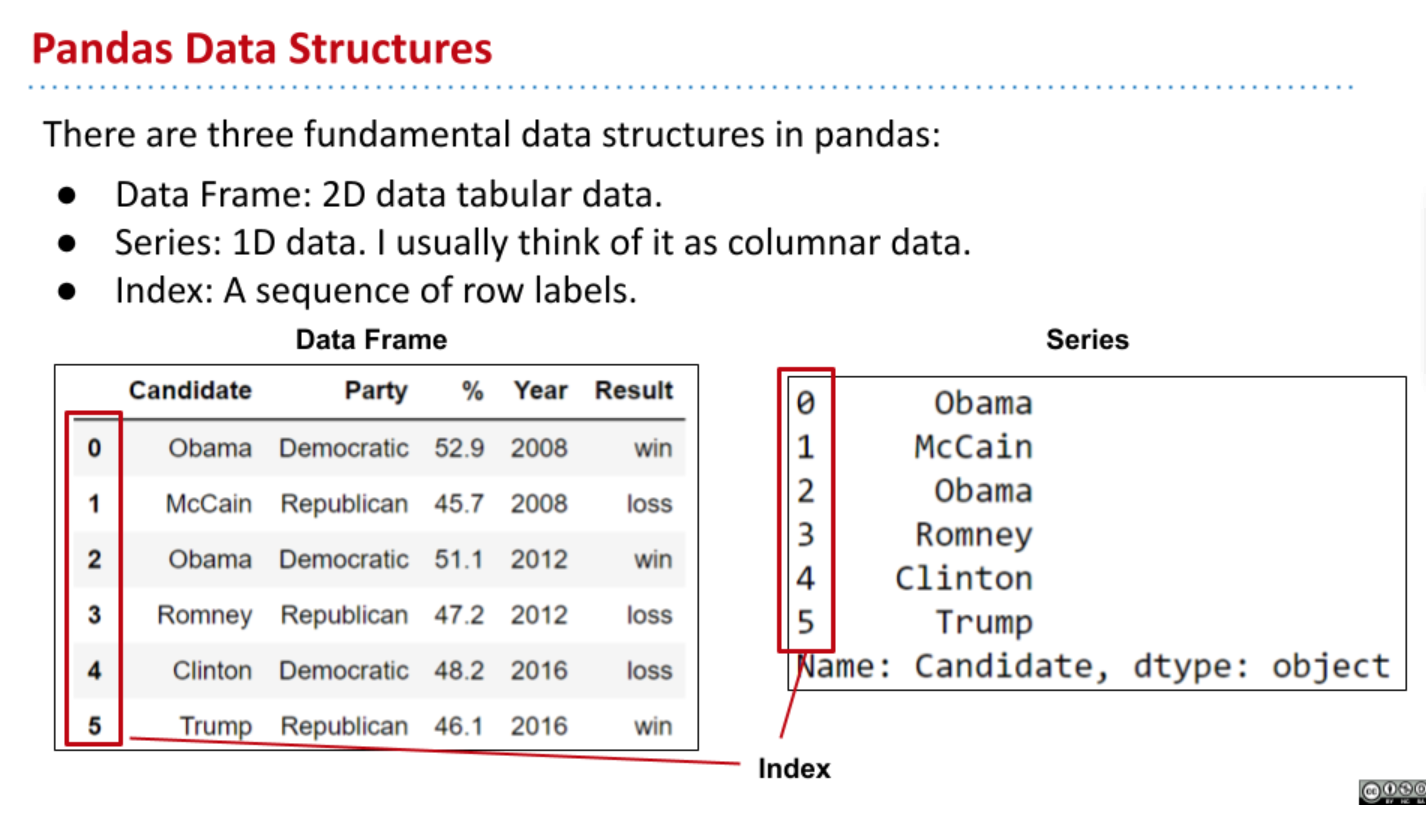
For a few demonstrations, we will load a data frame ``df`` containing information on the first 5 elements of the periodic table. Here, ``df`` is indexed by the element name rather than the default 0, 1, 2,$\dots$.

In [ ]:
df = pd.read_csv('elements.csv', index_col=0, usecols=[0,2,16,20], nrows=5)
df

### Indexing with [ ]

Indexing in pandas is a complex topic. One method of indexing is using square brackets. We have summarized the possible square bracket operations below. 

The table below should be read as: If I want to select a value from the [first col - **Select**] (i.e., if I want to select a column or multiple columns or rows conditionally, etc.,) then I should use the syntax in the [second col - **with Index**], and an example is shown in the third column.

So, if you want to select **multiple columns**, you have to use a **``List`` of column names**. An example of doing this is shown in the third row.

| **Select** | *with* **Index** | Syntax (example)|
| :----- | :----- | :----- |
| A column | column name (``str``) | ``df['symbol']``|
| Multiple columns| ``List`` of column names  | ``df[ ['symbol', 'atomic_mass] ]``|
| A row  | slice | ``df['Helium':'Helium']``|
| Multiple rows | slice  | ``df['Helium':'Beryllium']``|
| Rows conditionally | boolean ``List``  | ``df[[False,True,False,True,False]]``|
| Rows conditionally | boolean ``List`` (condition) | ``df[ df['atomic_mass']<5 ]``|

Notice the pattern: we use lists to access columns, and slices or boolean lists to access rows.

Try out each method of indexing!

In [ ]:
df['symbol']
# df[['symbol','atomic_mass']]
# df['Helium':'Helium']
# df['Helium':'Beryllium']
# df[[False,True,False,True,False]]
# df[ df['atomic_mass']<5 ]

### Indexing with ``loc``

``loc[]`` can be used to access a group of rows and columns by their labels. The labels for the rows and columns can be specified by either a single label, a list of labels, or a slice.

| **Select** | *with* **Index** | Syntax (example)|
| :----- | :----- | :----- |
| A group of rows and columns | slice/label/``List``, slice/label/``List`` | ``df.loc['Helium':'Boron',['symbol','atomic_mass'] ]``
| A row | slice/label/``List`` | ``df.loc['Lithium']``|
| A column | ``:``, slice/label/``List``  | ``df.loc[:,'symbol']``|

Try out each method of indexing!

In [ ]:
df.loc['Helium':'Boron',['symbol','atomic_mass'] ]
# df.loc['Lithium']
# df.loc[:,'symbol']

### Indexing with ``iloc``

``iloc[]`` is a purely integer-location based system for selecting positions. Instead of using labels, the data frame is indexed by integers with the top left being $(0,0)$. The integer indices can be an integer, list of integers, or slice. 

| **Select** | *with* **Index** | Syntax (example)|
| :----- | :----- | :----- |
| A group of rows and columns | slice/``int``/``List``, slice/``int``/``List`` | ``df.iloc[0:2,[0,2]]``
| A row | slice/``int``/``List`` | ``df.iloc[0]``|
| A column | ``:``, slice/``int``/``List``  | ``df.iloc[:,1]``|

Try out each method of indexing!

In [ ]:
df.iloc[0:2,[0,2]]
df.iloc[0]
df.iloc[:,1]

### Pandas and numpy

A data ``Series`` in pandas plays nice with numpy. For example, we can create a new column with label ``'mass2'``,

In [ ]:
df['mass2'] = 2*df['atomic_mass']
df

### Other methods

Pandas has much additional functionality. We will explore an important subset of these functions throughout the course of this module!

## Note: For the following sections please create intermediary tables and always make sure to visualize your result before moving on. 

## Q1: Plotting a HR-diagram

A Hertzsprung-Russell diagram is a plot of the absolute magnitude of stars in relation to their spectral characteristics (commonly, the B-V band magnitude). The HR diagram is an important tool for studying stellar evolution (studying the characteristics of stars throughout their lifetime). In this module, we will create a HR diagram. In the same folder of this .ipynb notebook, there is an image called 'hr.png'. Take a look at that to make sure your plot is correct.

[The diagonal block stretching from the upper left to bottom right is the main sequence, where stars spend the majority of their lives fusing hydrogen. After the hydrogen exhausted, stars enter a new evolutionary phase and become red giants and supergiants, occupying the region above the main sequence.\]

### The Hipparcos survey

The Hipparcos survey was an astrometry mission by the European Space Agency. The Hipparcos satellite collected data on the parallax, brightness, and motion of thousands of stars between 1989 and 1993. We will be using data in the Hipparcos survey to construct our plot.

The data is located in your repository as the file ``hip_main.dat``. Included also is a reference <a href='ref.pdf'>sheet</a> that you will need to use to understand what all the values mean.

Let's first open ``hip_main.dat`` in a text editor and see what it looks like (below).

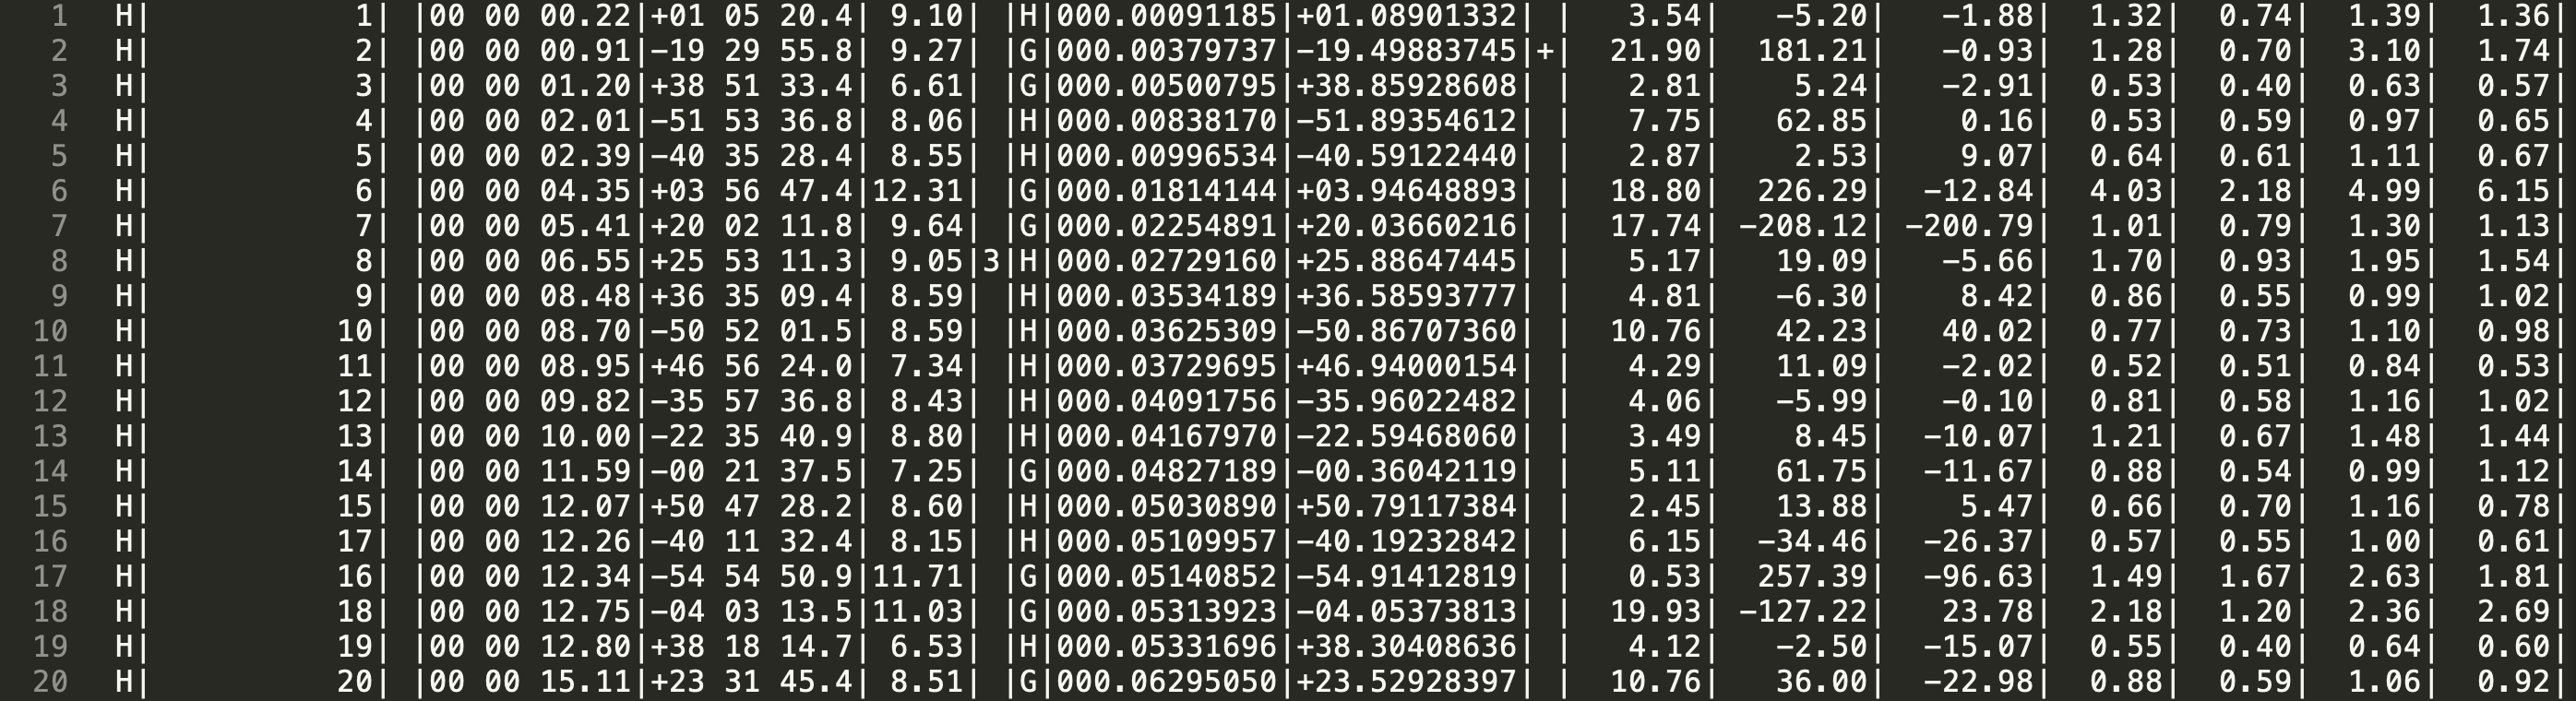

It appears that no headers are provided (no worries, we have the reference sheet!) and the data is formatted into columns delimited by the character ``|``.

### Q1a: which columns?

We'll need to read in the columns ``RAhms``,``DEdms``,``Plx``,``B-V``,``e_B-V``, and ``Hpmag``. Create a list ``cols`` of the index of each column. Your list should be from smallest to largest index. You can find the index of the columns listed from the reference sheet.

Hint: the index of the column ``HIP`` is 1.

In [ ]:
cols = ...

In [ ]:
tests.run('test_1a', cols)

### Q1b: read_csv

Using ``read_csv``, read in only the columns described in the previous problem. You will need to use the following flags:
- ``delimitter=...``
- ``usecols=...``
- ``names=['RAhms','DEdms','Plx','B-V','e_B-V','Hpmag']`` (to save some effort, this is given to you)
- ``dtype=str`` (this is also given to you)

In [ ]:
df = ...

In [ ]:
tests.run('test_1b', df)

### Q1c: to_numeric

Right now, the data type of each column is a ``str``. However, some of our columns contains numeric data that we want to manipulate. Use the function ``to_numeric`` to convert the columns ``['Plx','B-V','e_B-V','Hpmag']``. **Use the flag ``errors='coerce'``** (What does this do? Read the documentation!).

In [ ]:
cols = ['Plx','B-V','e_B-V','Hpmag']
...

In [ ]:
# to test your work, print out the dtypes of the columns
# the type for the converted rows should be float64
df.dtypes

### Q1d: dropna

In general, data sets such as these are not complete. In other words, rows are often missing entries. When this is the case, the entry is sometimes listed as ``NaN``. We can count the number of ``NaN`` entries for each column.

In [ ]:
np.sum(df.isnull())

Use the ``dropna`` method to remove all rows that contain ``NaN``. Look up the documentation for pandas dropna. Use the ``inplace=True`` argument (this makes sure to change the values in your original table and not just return a **copy** of the modified table. Reach out to course staff if you're confused about why this is necessary!)

In [ ]:
...

In [ ]:
tests.run('test_1d', df)
print(f'Number of entries remaining: {len(df)}')

### Q1e: filtering

The documentation states that *"The estimated parallax is given for every star, even if it appears to be insignificant or negative."* This means that some values of parallax may be less than 0, which is not a valid value. Furthermore, we want to somewhat selective about the B-V values we consider. Modify the dataset in the follow way:
1. Remove all rows with a zero or negative parallax
1. Remove all rows with a standard error of the (B-V) color index that is $\geq$ 0.05.

In [ ]:
# feel free to create multiple variables.
...

In [ ]:
tests.run('test_1e', df)
print(f'Number of entries remaining: {len(df)}')

### Q1f: calculating distances

Create a new column labeled ``'Dist'``, which contains the distance from the star **in lightyears**. For parallax $p$ **in arcseconds**, the distance $d$ **in parsecs** is,
$$d = \frac{1}{p}$$

Hints:
- Use the conversion factor 1 lyr = 3.262 pc
- What are the units of ``Plx``? Read the documentation!
- You can create a new column like so: ``df['Dist'] = ...``

Note: You can perform arithmetic operations on series. That is, if a series contains numeric values such [1,2,3,4], if I divide the series by 2, it will result in [0.5, 1, 1.5, 2].

In [ ]:
df['Dist'] = ...

In [ ]:
tests.run('test_1f', df)
df.describe()

### Q1g: calculating absolute magnitude

Create a new column labeled ``'M'``, which contains contains the absolute magnitude as determined by the dataset. The relative magnitude $m$ is given by the column ``'Hpmag'``, and is related to the absolute magnitude as well as the distance $d$ (``'Dist'``) by,

$$M = m - 5 \log_{10}(d/10 \text{pc})$$

Hints:
- make sure you're taking the common log, not the natural log
- the distance is divided by 10 parsecs (what are the units of ``'Dist'``?)

In [ ]:
df['M'] = ...

In [ ]:
tests.run('test_1g', df)

### Q1h: plotting

To save you some trouble, we have provided the code to plot the HR diagram. Make sure this roughly makes sense to you. **Add 1 line of code to save the figure to this current directory as ``'my_hr.png'``.**

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
hh = ax.hist2d(df['B-V'], df['M'], 
          bins=[np.arange(-0.5, 2, 0.01), np.arange(-6,13,0.05)], 
          norm=mpl.colors.LogNorm(), cmap='inferno')
ax.invert_yaxis()
ax.set_ylabel('M [mag]')
ax.set_xlabel('B$-$V [mag]')
ax.set_title('Hipparcos Survey')

fig.colorbar(hh[3], ax=ax, shrink=0.5)
plt.savefig('my_hr.png', bbox_inches='tight')

plt.show()

In [ ]:
tests.run('test_1h')

## Q2: The closest star

### Q2a: reset_index

When we filtered our data (e.g. removed all rows with zero or negative parallax), we disrupted the natural sequences of indices for the rows. For example, let's look at the first 10 rows:

In [ ]:
df.head(10)

Notice that the index goes from 0, 1, $\dots$, 10, **but skips 7**. This is because the row indexed by 7 was filtered out. Recall: the index corresponds to it's row, not necessarily the index of the row. 

This may cause issues later on with ``iloc``, so reset the index using ``reset_index`` using the flag ``drop=True``.

In [ ]:
df = ...

In [ ]:
tests.run('test_2a', df)

### Q2b: closest star

Using `idxmin` and ``iloc[]``, print the row corresponding to the closest star. Look up the documentation for idxmin if you're confused - it returns the index of the smallest element. Think about how you can then use the index and ``.iloc[]`` to get the closest star from the 'Dist' column.

In [ ]:
...

According to [wikipedia](https://en.wikipedia.org/wiki/Alpha_Centauri), the closest star to Earth is Alpha Centauri, located 4.37 lyr away at:
- RA: 14h 39m 36.49s
- DE: -60$^\circ$ 50' 15''

Does this match your result? What might be the source of any discrepancies?

## Submission

Check to make sure that you have answered all questions. Run all the cells so that all output is visible. Finally, export this notebook as a PDF (File/Download As/PDF via LaTeX (.pdf)) and submit to bCourses.

Created and edited by the ULAB staff. Last updated: December 2021.